In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

%config InlineBackend.figure_format = 'svg'
%matplotlib inline

#### t-SNE

(t-disturbed stochastic neighbor embedding)

Алгоритм был предложен в 2008 году Лоуренсом ван дер Маатеном и Джеффри Хинтоном

С помощью t-SNE можно снижать размерность данных, что позволяет визуализировать многомерные данные в 2D и 3D графике.

Если объекты в выборке имеют большое количество признаков, то можно получить представление о них,

преобразовав данные с помощью алгоритма t-SNE

В частности, можно увидеть возможность разделения объектов на кластеры, определить подходящее их число, а также

получить представление о качестве разбиения на кластеры.

In [2]:
from sklearn.manifold import TSNE

Загрузим данные о недвижимости

In [3]:
from sklearn.datasets import load_boston

In [4]:
boston = load_boston()

In [5]:
for line in boston.DESCR.split('\n'):
    print(line)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [6]:
data = boston.data

In [7]:
feature_names = boston.feature_names

In [8]:
x = pd.DataFrame(data, columns=feature_names)

In [9]:
x.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:
price = boston.target

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, price, test_size=0.3, random_state=7)


In [12]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((354, 13), (152, 13), (354,), (152,))

Масштабирование признаков



In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
scaler = StandardScaler()

In [15]:
x_train_scaled = scaler.fit_transform(x_train)

In [16]:
x_test_scaled = scaler.transform(x_test)

In [17]:
x_train_scaled = pd.DataFrame(x_train_scaled, columns=feature_names)

In [18]:
x_test_scaled = pd.DataFrame(x_test_scaled, columns=feature_names)

Применение t-SNE

In [19]:
tsne = TSNE(n_components=2, learning_rate=150, random_state=100)

In [20]:
x_train_tsne = tsne.fit_transform(x_train_scaled)
x_train_tsne

array([[ 1.97306767e+01, -1.94626217e+01],
       [ 1.21997356e+01,  4.55679685e-01],
       [ 2.79763107e+01, -2.31479168e+01],
       [ 2.82301903e+01, -2.44654903e+01],
       [ 2.38460693e+01, -1.71478729e+01],
       [-1.72620571e+00, -1.22397213e+01],
       [-3.47646618e+00, -1.07678719e+01],
       [-1.11658220e+01,  5.70147228e+00],
       [-1.52042179e+01,  1.49383354e+01],
       [ 2.71438313e+01, -1.37679443e+01],
       [-1.20941334e+01,  1.30416002e+01],
       [ 1.83208675e+01, -1.90984097e+01],
       [-2.58563066e+00,  4.81087399e+00],
       [-1.39892826e+01,  1.72273140e+01],
       [ 2.88109398e+01, -2.24357510e+01],
       [-1.74500217e+01,  1.83598404e+01],
       [-8.92891026e+00,  1.89253163e+00],
       [ 2.82703533e+01, -2.14444752e+01],
       [-1.51507416e+01,  1.34391785e+01],
       [ 2.08362331e+01, -1.52325583e+01],
       [ 9.81539154e+00,  4.43877816e-01],
       [-5.93669987e+00, -2.32771444e+00],
       [-1.33501492e+01,  1.51200075e+01],
       [-1.

In [21]:
x_train_tsne.shape



(354, 2)

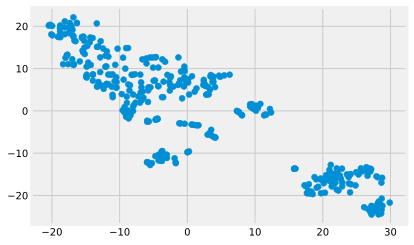

In [22]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1])

Разобьем данные на 2 кластера

In [23]:
from sklearn.cluster import KMeans

In [24]:
kmeans = KMeans(n_clusters=2)

In [25]:
labels_train = kmeans.fit_predict(x_train_scaled)

In [26]:
pd.value_counts(labels_train)

0    232
1    122
dtype: int64

In [27]:
labels_test = kmeans.predict(x_test_scaled)

График t-SNE с известными лейблами

Text(25, -7, 'Кластер 1')

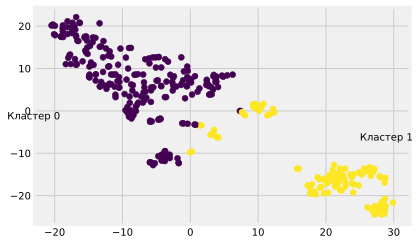

In [28]:
plt.scatter(x_train_tsne[:, 0], x_train_tsne[:, 1], c=labels_train)
plt.text(-27, -2, 'Кластер 0')
plt.text(25, -7, 'Кластер 1')

Посмотрим на данные расположенные в разных кластерах

In [29]:
y_train.mean()

22.595762711864406

In [30]:
y_train[labels_train==0].mean()

25.94439655172414

In [31]:
y_train[labels_train==1].mean()

16.227868852459018

Text(0.5, 0, 'Цена')

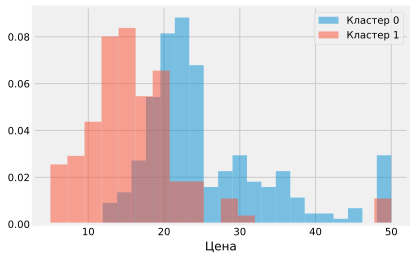

In [32]:
plt.hist(y_train[labels_train==0], bins=20, density=True, alpha=0.5)
plt.hist(y_train[labels_train==1], bins=20, density=True, alpha=0.5)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('Цена')

In [33]:
x_train.loc[labels_train==0, 'RM'].mean()



6.44851724137931

In [34]:
x_train.loc[labels_train==1, 'RM'].mean()




5.9092868852459

In [35]:
x_train.loc[labels_train==0, 'CRIM'].mean()



0.2679815948275862

In [36]:
x_train.loc[labels_train==1, 'CRIM'].mean()


9.056794180327868

Text(0.5, 0, 'CRIM (per capita crime rate by tomn)')

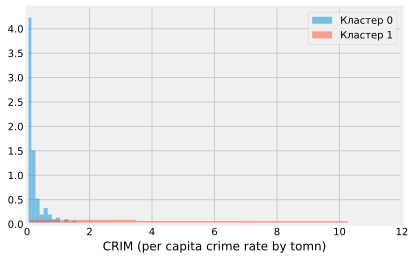

In [37]:
plt.hist(x_train.loc[labels_train==0, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'CRIM'], bins=20, density=True, alpha=0.5)
plt.xlim(0, 12)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('CRIM (per capita crime rate by tomn)')

Text(0.5, 0, 'NOX\nnitric oxides concentration (parts per 10 million)')

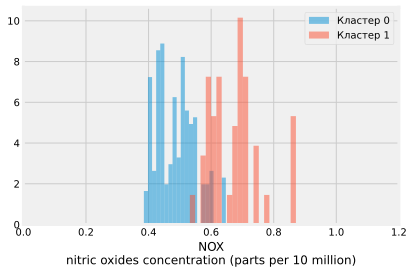

In [38]:
plt.hist(x_train.loc[labels_train==0, 'NOX'], bins=20, density=True, alpha=0.5)
plt.hist(x_train.loc[labels_train==1, 'NOX'], bins=20, density=True, alpha=0.5)
plt.xlim(0, 1.2)
plt.legend(['Кластер 0', 'Кластер 1'])
plt.xlabel('NOX\nnitric oxides concentration (parts per 10 million)')



#### Использование информации, полученной с помощью t-SNE на моделях

Базовая модель предсказания цены на недвеижимость (до разделения на кластеры)

In [39]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()


In [40]:
lr.fit(x_train_scaled, y_train)

LinearRegression()

In [41]:
y_test_pred = lr.predict(x_test_scaled)

In [42]:
from sklearn.metrics import r2_score
r2_score(y_test, y_test_pred)

0.6508417720329546

Две модели, построенные на объектах из разных кластеров

In [43]:
# 1я модель - на объектах из Кластера 0
lr.fit(x_train_scaled.loc[labels_train==0, :],
       y_train[labels_train==0])

y_test_pred_0 = lr.predict(x_test_scaled.loc[labels_test==0, :])

r2_score(y_test[labels_test==0], y_test_pred_0)

0.831603433529844

In [44]:
# 2я модель - на объектах из Кластера 1
lr.fit(x_train_scaled.loc[labels_train==1, :],
       y_train[labels_train==1])

y_test_pred_1 = lr.predict(x_test_scaled.loc[labels_test==1, :])

r2_score(y_test[labels_test==1], y_test_pred_1)


0.645812742955119

In [45]:
# Объединение известных правильных ответов по оюъектам из двух кластеров
y_test_all = np.hstack([y_test[labels_test==0],
                        y_test[labels_test==1]])

In [46]:
# Объединение предсказанных ответов по объектам из двух кластеров
y_test_pred_all = np.hstack([y_test_pred_0, y_test_pred_1])

In [47]:
# R2 по всем объектам тестовой выборки
r2_score(y_test_all, y_test_pred_all)


0.8055877528812475